<a href="https://colab.research.google.com/github/csap7/plantseedlingclassification/blob/master/plant_seedling_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#files.upload()

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [21]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s plant-seedling

ref                                    title                           size  lastUpdated          downloadCount  
-------------------------------------  -----------------------------  -----  -------------------  -------------  
vbookshelf/v2-plant-seedlings-dataset  V2 Plant Seedlings Dataset       2GB  2018-12-13 14:20:52           2023  
xalphahelix/plant-seedling-models      Plant Seedling Models            9MB  2018-03-25 11:02:18             31  
mehradaria/plantseedling               Plant Seedling Classification   24MB  2018-07-04 11:19:02             30  
jannesklaas/kerasseedlings             Keras-Seedlings                  2GB  2018-11-10 15:47:42             66  
tivadardanka/plant-segmentation        Plant segmentation             750MB  2019-05-27 09:30:10             24  


In [22]:
# Downloading dataset
!kaggle competitions download -c plant-seedlings-classification --force

  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 4.79MB/s]
 90% 77.0M/86.0M [00:01<00:00, 44.2MB/s]
100% 86.0M/86.0M [00:01<00:00, 70.8MB/s]
100% 1.59G/1.60G [00:31<00:00, 76.1MB/s]
100% 1.60G/1.60G [00:31<00:00, 55.3MB/s]


In [23]:
# Unzipping train/test data
!mkdir train
!unzip train.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  train.zip
   creating: train/train/
   creating: train/train/Fat Hen/
  inflating: train/train/Fat Hen/5bdfa3a44.png  
  inflating: train/train/Fat Hen/a86b9c0cd.png  
  inflating: train/train/Fat Hen/f3f6559bf.png  
  inflating: train/train/Fat Hen/946b48f62.png  
  inflating: train/train/Fat Hen/4d7fd4020.png  
  inflating: train/train/Fat Hen/2509e5bc5.png  
  inflating: train/train/Fat Hen/e2462573b.png  
  inflating: train/train/Fat Hen/7e98e4aa6.png  
  inflating: train/train/Fat Hen/075cb6666.png  
  inflating: train/train/Fat Hen/b43d0a350.png  
  inflating: train/train/Fat Hen/afac20b21.png  
  inflating: train/train/Fat Hen/4d2efbb45.png  
  inflating: train/train/Fat Hen/f0923dcd6.png  
  inflating: train/train/Fat Hen/180f41d53.png  
  inflating: train/train/Fat Hen/bfdeafadd.png  
  inflating: train/train/Fat Hen/ac6625b0f.png  
  inflating: train/train/Fat Hen/ba5c8f87f.png  
  inflating: train/train/Fat Hen/e7

In [24]:
!mkdir test
!unzip test.zip -d test

mkdir: cannot create directory ‘test’: File exists
Archive:  test.zip
   creating: test/test/
  inflating: test/test/c0461776c.png  
  inflating: test/test/4bbfd1e05.png  
  inflating: test/test/1d0cbd819.png  
  inflating: test/test/93079d970.png  
  inflating: test/test/856f2910a.png  
  inflating: test/test/976e4e079.png  
  inflating: test/test/b31292706.png  
  inflating: test/test/29bab7cad.png  
  inflating: test/test/37297a64c.png  
  inflating: test/test/f2dc546ca.png  
  inflating: test/test/b6a3f7876.png  
  inflating: test/test/8874bba69.png  
  inflating: test/test/1459e96a0.png  
  inflating: test/test/9a3f20121.png  
  inflating: test/test/5315c2dca.png  
  inflating: test/test/b7a7f6390.png  
  inflating: test/test/20e562fd5.png  
  inflating: test/test/e3f50adfc.png  
  inflating: test/test/6ba4ef411.png  
  inflating: test/test/acdb75e00.png  
  inflating: test/test/e0ec5b6a1.png  
  inflating: test/test/219fd68d5.png  
  inflating: test/test/41f1c3cdb.png  
  inflati

In [0]:
from keras.models import Sequential
from keras.models import Model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os
import sys
import cv2
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from subprocess import check_output

In [0]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [0]:
def classes_to_int(label):
    # label = classes.index(dir)
    label = label.strip()
    if label == "Black-grass":  return 0
    if label == "Charlock":  return 1
    if label == "Cleavers":  return 2
    if label == "Common Chickweed":  return 3
    if label == "Common wheat":  return 4
    if label == "Fat Hen":  return 5
    if label == "Loose Silky-bent": return 6
    if label == "Maize":  return 7
    if label == "Scentless Mayweed": return 8
    if label == "Shepherds Purse": return 9
    if label == "Small-flowered Cranesbill": return 10
    if label == "Sugar beet": return 11
    print("Invalid Label", label)
    return 12

In [0]:
def int_to_classes(i):
    if i == 0: return "Black-grass"
    elif i == 1: return "Charlock"
    elif i == 2: return "Cleavers"
    elif i == 3: return "Common Chickweed"
    elif i == 4: return "Common wheat"
    elif i == 5: return "Fat Hen"
    elif i == 6: return "Loose Silky-bent"
    elif i == 7: return "Maize"
    elif i == 8: return "Scentless Mayweed"
    elif i == 9: return "Shepherds Purse"
    elif i == 10: return "Small-flowered Cranesbill"
    elif i == 11: return "Sugar beet"
    print("Invalid class ", i)
    return "Invalid Class"

In [0]:
NUM_CLASSES = 12
# we need images of same size so we convert them into the size
WIDTH = 128
HEIGHT = 128
DEPTH = 3
inputShape = (WIDTH, HEIGHT, DEPTH)
# initialize number of epochs to train for, initial learning rate and batch size
EPOCHS = 2
INIT_LR = 1e-3
BS = 32

In [0]:
def readTrainData(trainDir):
    data = []
    labels = []
    # loop over the input images
    dirs = os.listdir(trainDir) 
    for dir in dirs:
        absDirPath = os.path.join(os.path.sep,trainDir, dir)
        images = os.listdir(absDirPath)
        for imageFileName in images:
            # load the image, pre-process it, and store it in the data list
            imageFullPath = os.path.join(trainDir, dir, imageFileName)
            #print(imageFullPath)
            img = load_img(imageFullPath)
            arr = img_to_array(img)  # Numpy array with shape (233,233,3)
            arr = cv2.resize(arr, (HEIGHT,WIDTH)) #Numpy array with shape (HEIGHT, WIDTH,3)
            #print(arr.shape) 
            data.append(arr)
            label = classes_to_int(dir)
            labels.append(label)
    return data, labels

In [0]:
def createModel():
    model = Sequential()
    # first set of CONV => RELU => POOL layers
    # The CONV  layer will learn 20 convolution filters, each of which are 5×5.
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=inputShape))
    # We then apply a ReLU activation function followed by 2×2 max-pooling in both 
    # the x and y direction with a stride of two. 
    #To visualize this operation, consider a sliding window that “slides” across 
    #the activation volume, taking the max operation over each region, while taking 
    #a step of two pixels in both the horizontal and vertical direction.
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # second set of CONV => RELU => POOL layers
    #This time we are learning 50 convolutional filters rather than the 20 convolutional
    #filters as in the previous layer set. It’s common to see the number of CONV 
    #filters learned increase the deeper we go in the network architecture.
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # first (and only) set of FC => RELU layers
    # Flattening out the volume into a set of fully-connected layers
    # Take the output of the preceding MaxPooling2D layer and flatten it into a single vector.
    # This operation allows us to apply our dense/fully-connected layers.
    # Fully-connected layer contains 500 nodes which is passed through another 
    # nonlinear ReLU activation.
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    # softmax classifier
    # Another fully-connected layer, but this one is special — the number of nodes is equal 
    # to the number of classes  (i.e., the classes we want to recognize).
    # This Dense layer is then fed into our softmax classifier
    # which will yield the probability for each class.
    model.add(Dense(output_dim=12))
    model.add(Activation("softmax"))
    # returns our fully constructed deep learning + Keras image classifier 
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    # use binary_crossentropy if there are two classes
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [33]:
random.seed(10)
allLabels =  os.listdir("/content/train/train/")  # list of subdirectories and files
print("Loading images")
sys.stdout.flush()
X, Y = readTrainData("/content/train/train/")
# scale the raw pixel intensities to the range [0, 1]
X = np.array(X, dtype="float") / 255.0
Y = np.array(Y)
# convert the labels from integers to vectors
Y =  to_categorical(Y, num_classes=12)

print("Partition data into 75:25")
sys.stdout.flush()
# partition the data into training and testing splits using 75% training and 25% for validation
(trainX, valX, trainY, valY) = train_test_split(X,Y,test_size=0.25, random_state=10)

#construct the image generator for data augmentation
print("Generating images")
sys.stdout.flush()
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, \
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,\
    horizontal_flip=True, fill_mode="nearest")


Loading images
Partition data into 75:25
Generating images


In [34]:
# initialize the model
print("compiling model...")
sys.stdout.flush()
model = createModel()
# train the network
print("training network...")
sys.stdout.flush()
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS), \
    validation_data=(valX, valY), \
    steps_per_epoch=len(trainX) // BS, epochs=EPOCHS, callbacks=[callbacks], verbose=1)

# save the model to disk
print("Saving model to disk")
sys.stdout.flush()
model.save("/tmp/mymodel")

compiling model...


W0714 16:17:57.476153 140481509177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 16:17:57.524821 140481509177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 16:17:57.537299 140481509177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 16:17:57.598223 140481509177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launch

training network...


W0714 16:17:58.477931 140481509177216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 16:17:58.552702 140481509177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2
111/111 [==============================] - 187s 2s/step - loss: 2.1307 - acc: 0.2683 - val_loss: 1.7230 - val_acc: 0.3939
Epoch 2/2
111/111 [==============================] - 185s 2s/step - loss: 1.6585 - acc: 0.4106 - val_loss: 1.4774 - val_acc: 0.4790
Saving model to disk


Sugar beet


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


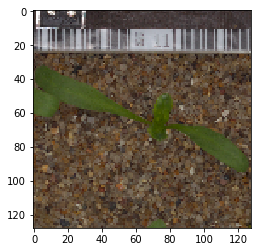

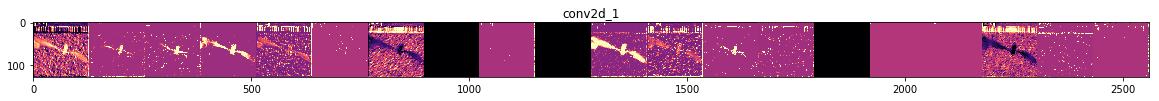

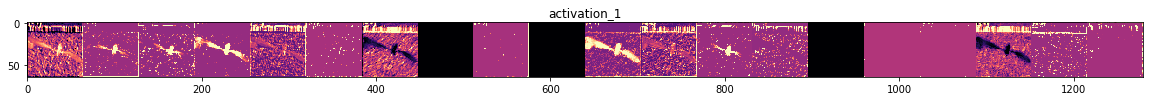

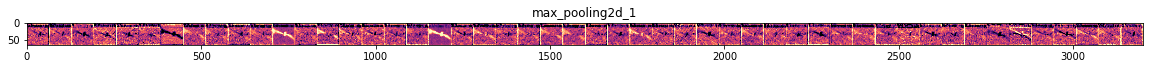

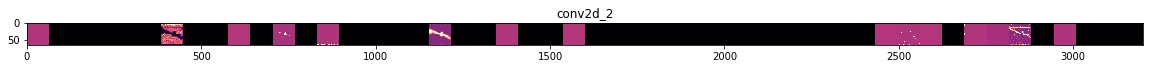

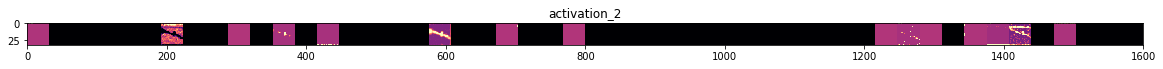

In [35]:
################################# LAYER CONVOLUTION VISUALIZATION ##############################
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

i=0

seedling1_fnames = os.listdir('/content/train/train/Black-grass/')
seedling2_fnames = os.listdir('/content/train/train/Charlock/')
seedling3_fnames = os.listdir('/content/train/train/Cleavers/')
seedling4_fnames = os.listdir('/content/train/train/Common Chickweed/')
seedling5_fnames = os.listdir('/content/train/train/Common wheat/')
seedling6_fnames = os.listdir('/content/train/train/Fat Hen/')
seedling7_fnames = os.listdir('/content/train/train/Loose Silky-bent/')
seedling8_fnames = os.listdir('/content/train/train/Maize/')
seedling9_fnames = os.listdir('/content/train/train/Scentless Mayweed/')
seedling10_fnames = os.listdir('/content/train/train/Shepherds Purse/')
seedling11_fnames = os.listdir('/content/train/train/Small-flowered Cranesbill/')
seedling12_fnames = os.listdir('/content/train/train/Sugar beet/')

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a seedling from the training set.
seedling1_img_files = [os.path.join('/content/train/train/Black-grass/', f) for f in seedling1_fnames]
seedling2_img_files = [os.path.join('/content/train/train/Charlock/', f) for f in seedling2_fnames]
seedling3_img_files = [os.path.join('/content/train/train/Cleavers/', f) for f in seedling3_fnames]
seedling4_img_files = [os.path.join('/content/train/train/Common Chickweed/', f) for f in seedling4_fnames]
seedling5_img_files = [os.path.join('/content/train/train/Common wheat/', f) for f in seedling5_fnames]
seedling6_img_files = [os.path.join('/content/train/train/Fat Hen/', f) for f in seedling6_fnames]
seedling7_img_files = [os.path.join('/content/train/train/Loose Silky-bent/', f) for f in seedling7_fnames]
seedling8_img_files = [os.path.join('/content/train/train/Maize/', f) for f in seedling8_fnames]
seedling9_img_files = [os.path.join('/content/train/train/Scentless Mayweed/', f) for f in seedling9_fnames]
seedling10_img_files = [os.path.join('/content/train/train/Shepherds Purse/', f) for f in seedling10_fnames]
seedling11_img_files = [os.path.join('/content/train/train/Small-flowered Cranesbill/', f) for f in seedling11_fnames]
seedling12_img_files = [os.path.join('/content/train/train/Sugar beet/', f) for f in seedling12_fnames]


img_path = random.choice(seedling1_img_files + seedling2_img_files + seedling3_img_files+ seedling4_img_files + seedling5_img_files
                        + seedling6_img_files + seedling7_img_files + seedling8_img_files + seedling9_img_files + seedling10_img_files 
                        + seedling11_img_files + seedling12_img_files)
print(img_path[:-14].replace("/content/train/train/", ""))
img = load_img(img_path, target_size=(128, 128))  # this is a PIL image
plt.imshow(img)

x   = img_to_array(img)                           # Numpy array with shape (128, 128, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 128, 128, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Displaying representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
      # plt.imsave("layer-viz.png", display_grid)

    #-----------------
    # Display the grid
    #-----------------

    
    
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    plt.imshow( display_grid, aspect='auto', cmap='magma')
    

Generating plots...


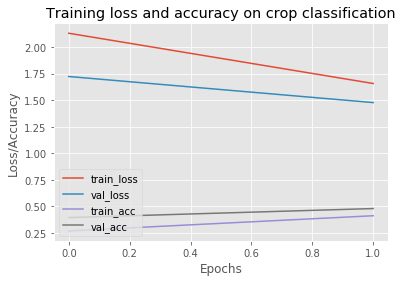

In [40]:
# set the matplotlib backend so figures can be saved in the background
# plot the training loss and accuracy
print("Generating plots...")
sys.stdout.flush()
matplotlib.use("Agg")
matplotlib.pyplot.style.use("ggplot")
matplotlib.pyplot.figure()
N = EPOCHS
matplotlib.pyplot.plot(np.arange(0, N), H.history["loss"], label="train_loss")
matplotlib.pyplot.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
matplotlib.pyplot.plot(np.arange(0, N), H.history["acc"], label="train_acc")
matplotlib.pyplot.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
matplotlib.pyplot.title("Training loss and accuracy on crop classification")
matplotlib.pyplot.xlabel("Epochs")
matplotlib.pyplot.ylabel("Loss/Accuracy")
matplotlib.pyplot.legend(loc="lower left")
matplotlib.pyplot.savefig("plot.png")

In [39]:
def readTestData(testDir):
    data = []
    filenames = []
    # loop over the input images
    images = os.listdir(testDir)
    for imageFileName in images:
        # load the image, pre-process it, and store it in the data list
        imageFullPath = os.path.join(testDir, imageFileName)
        #print(imageFullPath)
        img = load_img(imageFullPath)
        arr = img_to_array(img)  # Numpy array with shape (...,..,3)
        arr = cv2.resize(arr, (HEIGHT,WIDTH)) 
        data.append(arr)
        filenames.append(imageFileName)
    return data, filenames

# read test data and find its classification
testX, filenames = readTestData("/content/test/test/")
# scale the raw pixel intensities to the range [0, 1]
testX = np.array(testX, dtype="float") / 255.0

from keras.models import load_model
mymodel = load_model('/tmp/mymodel')
yFit = mymodel.predict(testX, batch_size=10, verbose=1)

794/794 [==============================] - 11s 14ms/step


In [0]:
import csv
!mkdir sample_output
!unzip sample_submission.csv.zip -d sample_output
with open('/content/sample_output/sample_submission.csv', 'w', newline='') as csvfile:
    fieldnames = ['file', 'species']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index, file in enumerate(filenames):
        classesProbs = yFit[index]
        maxIdx = 0
        maxProb = 0;
        for idx in range(0,11):
            if(classesProbs[idx] > maxProb):
                maxIdx = idx
                maxProb = classesProbs[idx]
        writer.writerow({'file': file, 'species': int_to_classes(maxIdx)})
print("Writing complete")